## Genomics and High-Dimensional Data: Written Analysis, Peer Review and Discussion

### Problem 3

The hyper-parameter choices used in data analysis techniques can have a large impact on the inferences made. As you may have encountered, finding the best choice of parameter such as perplexity in T-SNE or the number of clusters can be an ambiguous problem. We will now investigate the sensitivity of your results to changes in these hyper-parameters, with the goal of understanding how your conclusions may vary depending on these choices.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.cluster import KMeans

1. (3 points) When we created the T-SNE plot in Problem 1, we ran T-SNE on the top 50 PC's of the data. But we could have easily chosen a different number of PC's to represent the data. Run T-SNE using 10, 50, 100, 250, and 500 PC's, and plot the resulting visualization for each. What do you observe as you increase the number of PC's used?

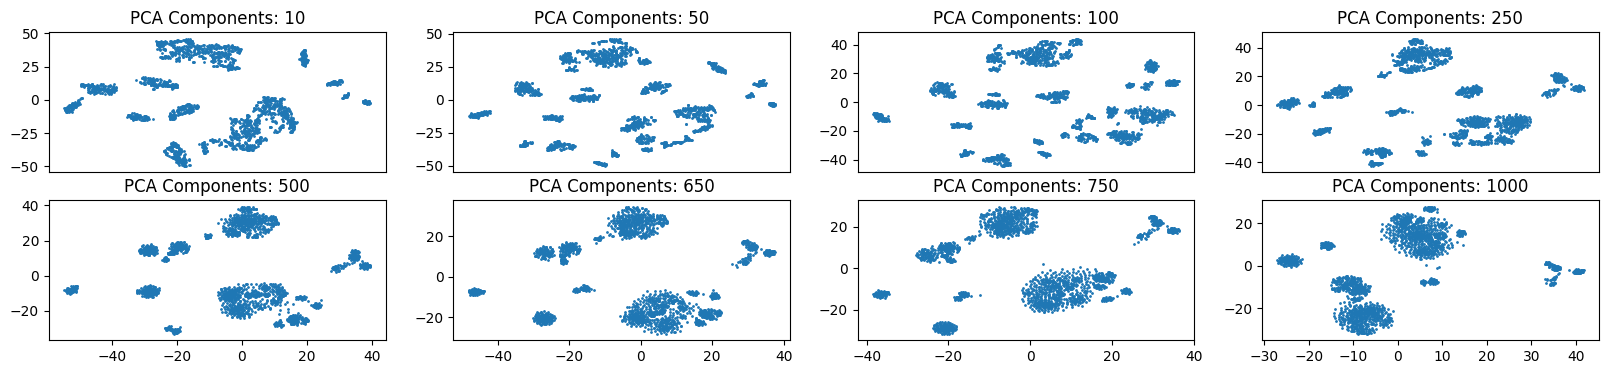

In [2]:
# Load the unsupervised learning data
dataset = np.load("./data/p2_unsupervised/X.npy")

# Take the log2 transform of the data
dataset = np.log2(dataset + 1)

# List the number of principal components to use for each of the tests
n_components = [10, 50, 100, 250, 500, 650, 750, 1000]

# Perform PCA on the data for each of the number of components
pca_fits = [
    PCA(n_components=n).fit(dataset) for n in n_components
]

# Create a figure with as many subplots as there are PCA fits and two rows
fig, axes = plt.subplots(2, int(len(n_components)/2), figsize=(20, 4))

# Generate 1 plot with 5 subplots, one for the result of a TSNE fit for 
# each of the PCA results
for i, pca_fit in enumerate(pca_fits):

    # Perform a TSNE fit on the PCA transformed data
    tsne_model = TSNE(n_components=2, perplexity=40) 
    tsne_fit = tsne_model.fit(pca_fit.transform(dataset))

    # Plot the TSNE fit on either the first or second row of subplots
    # depending on the index of the PCA fit. Disable the x-axis ticks
    # for all but the bottom row of subplots
    if i < len(n_components)/2:
        ax = axes[0, i]
        ax.set_xticks([])
    else:
        ax = axes[1, i - int(len(n_components)/2)]
    
    # Plot the TSNE fit
    ax.scatter(
        tsne_fit.embedding_[:, 0], 
        tsne_fit.embedding_[:, 1], 
        s=1
    )
    ax.set_title(f"PCA Components: {n_components[i]}")

# Show the plot
plt.show()


- From running the script multiple times, it was made apparent that the more PC's used, the more the data points begin to get clumped into a lower number of distinct clusters. This was made even more evident by including new plots for 650, 750 and 1000 PC's. In the lower range of clusters, clusters still emerge, but they are more numerous and with a higher number of surrounding little islands. As the number of PC's increases, the clusters become less sparse until they reach a point where they have a very distinct shape that does not change much as the PC's continue to increase. 

   This may be caused by the fact that the data keeps using the same set of main principal components to represent the "core" of the data, but as the PC's get higher, more and more of the variance gets captured in the final clustering, until a "sweet-spot" gets reached where the addition of more PC's is just helping with including outliers in the existing clusters.

2. (13 points) Pick three hyper-parameters below (the 3 is the total number that a report needs to analyze. It can take a) 2 from A, 1 from B, or b) 1 from A, 2 from B.) and analyze how changing the hyper-parameters affect the conclusions that can be drawn from the data. Please choose at least one hyper-parameter from each of the two categories (visualization and clustering/feature selection). At minimum, evaluate the hyper-parameters individually, but you may also evaluate how joint changes in the hyper-parameters affect the results. You may use any of the datasets we have given you in this project. For visualization hyper-parameters, you may find it productive to augment your analysis with experiments on synthetic data, though we request that you use real data in at least one demonstration.

   Some possible choices of hyper-parameters are:

   **Category A (visualization):**

   - T-SNE perplexity
   - T-SNE learning rate
   - T-SNE early exaggeration
   - T-SNE initialization
   - T-SNE number of iterations/convergence tolerance

   **Category B (clustering/feature selection):**

   - Effect of number of PC's chosen on clustering
   - Type of clustering criterion used in hierarchical clustering (single linkage vs ward, for example)
   - Number of clusters chosen for use in unsupervised feature selection and how it affects the quality of the chosen features
   - Magnitude of regularization and its relation to your feature selection (for example, does under or over-regularizing the model lead to bad features being selected?)
   - Type of regularization (L1, L2, elastic net) in the logistic regression step and how the resulting features selected differ

   **General guidelines:**

   - For visualization hyper-parameters, provide substantial visualizations and explanation on how the parameter affects the image.
   - For clustering/feature selection, provide visualizations and/or numerical results which demonstrate how different choices affect the downstream visualizations and feature selection quality.
   - Provide adequate explanations in words for each of these visualizations and numerical results.

In [6]:
# ================ REAL DATASET ================ #

# Load the training data used for supervised learning
dataset = np.load("./data/p2_evaluation/X_train.npy")

# Since the data consists of genetic data, we will take the log2 transform
# of the data
dataset = np.log2(dataset + 1)

# ============== SYNTHETIC DATASET ============= #

# Generates a dataset from a gaussian mixture with random means and covariance matrices
def generate_gaussian_mixture(n_samples, n_features, n_classes):

    # Generate random means and covariance matrices
    means = np.random.normal(
        size=(n_classes, n_features)
    )
    covs = np.array(
        [np.cov(np.random.normal(size=(n_features, n_features))) for _ in range(n_classes)]
    )

    # Generate a random mixture of the means and covariance matrices
    mixture = np.random.dirichlet(np.ones(n_classes), size=1)[0]

    # Generate a random dataset from the mixture
    gaussian_mixture = np.vstack([
        np.random.multivariate_normal(
            mean=means[i], 
            cov=covs[i], 
            size=int(n_samples * mixture[i])
        ) for i in range(n_classes)
    ])

    # Shuffle the dataset
    np.random.shuffle(gaussian_mixture)

    return gaussian_mixture

# Generate a synthetic dataset with the same shape as the real dataset
synthetic_dataset = generate_gaussian_mixture(
    n_samples=500,
    n_features=200,
    n_classes=5
)

# ================== PCA FITS ================== #

# Get the first 500 principal components of the original dataset
# (Both the original and synthetic datasets)
pca_fit = PCA(n_components=500).fit(dataset)
pca_synthetic_fit = PCA(n_components=100).fit(synthetic_dataset)

*Hyper-parameter 1: T-SNE perplexity*

In [7]:
# List of the different perplexities to use for the TSNE fit
perplexities = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 

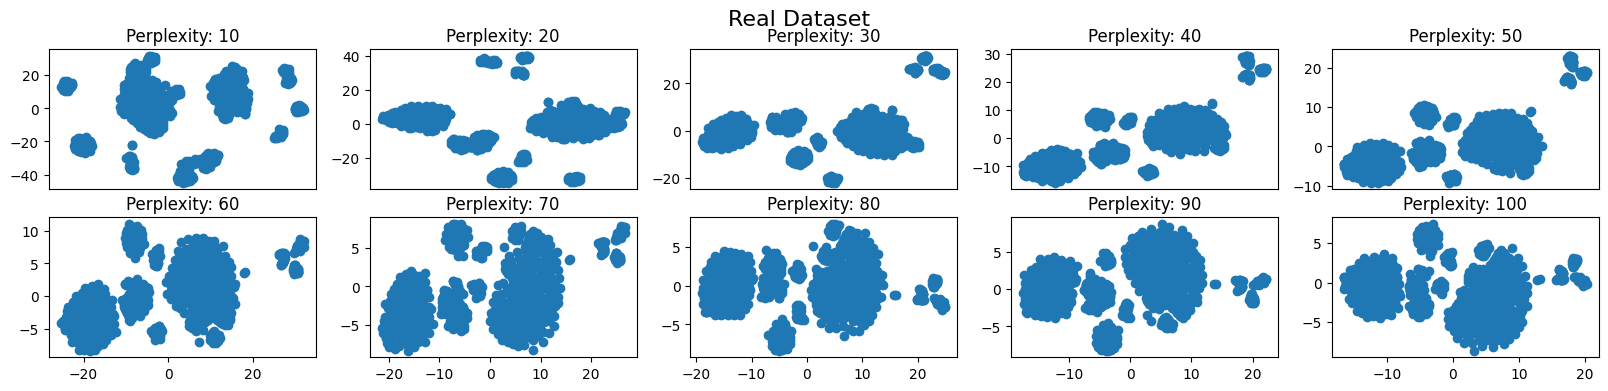

In [21]:
# ================ REAL DATASET ================ #

# Create a figure with 4 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(20, 4))

# Perform a TSNE fit on the original dataset for each of the perplexities
for idx, perplexity in enumerate(perplexities):

    # Perform a TSNE fit on the original dataset
    tsne_model = TSNE(n_components=2, perplexity=perplexity) 
    tsne_fit = tsne_model.fit(pca_fit.transform(dataset))

    # Remove the x-axis ticks for all but the bottom row of subplots
    if idx <= 5:
        ax = axes[0, idx]
        ax.set_xticks([])
    else:
        ax = axes[1, idx - 5]

    # Plot the TSNE fit
    ax.scatter(
        tsne_fit.embedding_[:, 0], 
        tsne_fit.embedding_[:, 1], 
    )
    ax.set_title(f"Perplexity: {perplexities[idx]}")

    # Add a super title to the figure
    fig.suptitle("Real Dataset", fontsize=16)

# Show the plot
plt.show()

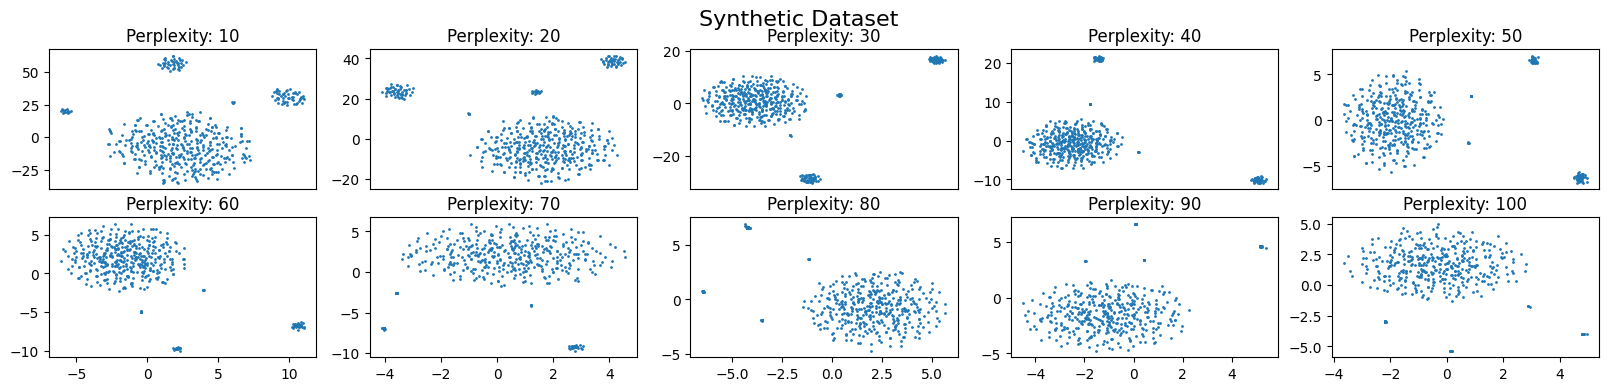

In [5]:
# ============== SYNTHETIC DATASET ============= #

# Create a figure with 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(20, 4))

# Perform a TSNE fit on the synthetic dataset for each of the perplexities
for idx, perplexity in enumerate(perplexities):

    # Perform a TSNE fit on the synthetic dataset
    tsne_model = TSNE(n_components=2, perplexity=perplexity) 
    tsne_fit = tsne_model.fit(pca_synthetic_fit.transform(synthetic_dataset))

    # Remove the x-axis ticks for all but the bottom row of subplots
    if idx < 5:
        ax = axes[0, idx]
        ax.set_xticks([])
    else:
        ax = axes[1, idx - 5]

    # Plot the TSNE fit
    ax.scatter(
        tsne_fit.embedding_[:, 0], 
        tsne_fit.embedding_[:, 1], 
        s=1
    )
    ax.set_title(f"Perplexity: {perplexities[idx]}")

    # Add a super title to the figure
    fig.suptitle("Synthetic Dataset", fontsize=16)

# Show the plot
plt.show()

- In the original paper for TSNE, perplexity is described as a "smooth measure of the effective number of neighbors". In simpler terms, this means that as you increase the perplexity, you should see the data points begin to cluster together more and more, as each data point is considering more and more of its neighbors when determining where to place itself in the reduced space. 
   
   This is exactly what was seen in the plots above, where the perplexity was varied from 10 to 100 in both a real and synthetic dataset. In the lower perplexity plots, the data tends to spread out more, as almost all data points are technically "repelling" from the others (only a small number are experiencing attractive forces). As the perplexity increases, the data points begin to cluster together more and more. This is particularly apparent in the plots for the synthetic data, where the clusters that start as relatively small point cloud in the low perplexity case, eventually turn into almost single points as the perplexity reaches a value of 100. 
   
   Once again, this is because the data points are now considering more and more of their neighbors, effectively "attracting" themselves into a single position. Its worth mentioning that if the clusters don't have enough space between them (like for the real dataset above), as the perplexity increases you may start to see the creation of a single very large cluster that, with a high enough value of perplexity, eventually converges into a single point. 

*Hyper-parameter 2: Early Exaggeration*

In [26]:
# List of the different perplexities to use for the TSNE fit
exaggerations = [1, 3, 5, 8, 12, 20, 50, 100, 250, 500] 

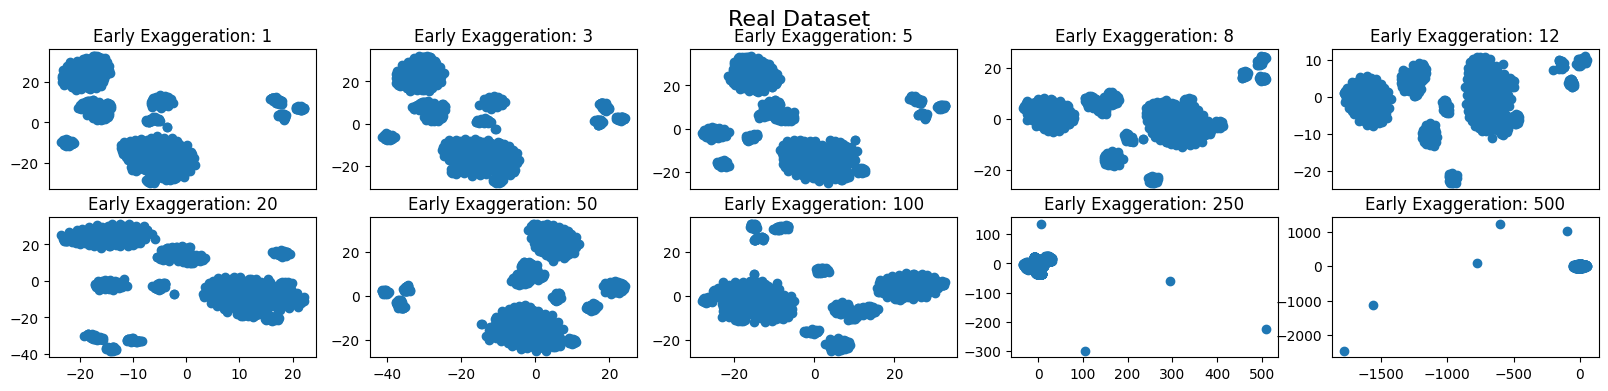

In [27]:
# ================ REAL DATASET ================ #

# Number of tests
num_tests = len(exaggerations)
half_tests = int(num_tests / 2)

# Create a figure two rows
fig, axes = plt.subplots(2, half_tests, figsize=(20, 4))

# Perform a TSNE fit on the original dataset for each of the perplexities
for idx, exaggeration in enumerate(exaggerations):

    # Perform a TSNE fit on the original dataset
    tsne_model = TSNE(
        n_components=2, 
        early_exaggeration=exaggeration
    ) 
    tsne_fit = tsne_model.fit(pca_fit.transform(dataset))

    # Remove the x-axis ticks for all but the bottom row of subplots
    # and dynamically generate the two rows of subplots
    if idx < half_tests:
        ax = axes[0, idx]
        ax.set_xticks([])
    else:
        ax = axes[1, idx - half_tests]

    # Plot the TSNE fit
    ax.scatter(
        tsne_fit.embedding_[:, 0], 
        tsne_fit.embedding_[:, 1], 
    )
    ax.set_title(f"Early Exaggeration: {exaggerations[idx]}")

    # Add a super title to the figure
    fig.suptitle("Real Dataset", fontsize=16)

# Show the plot
plt.show()

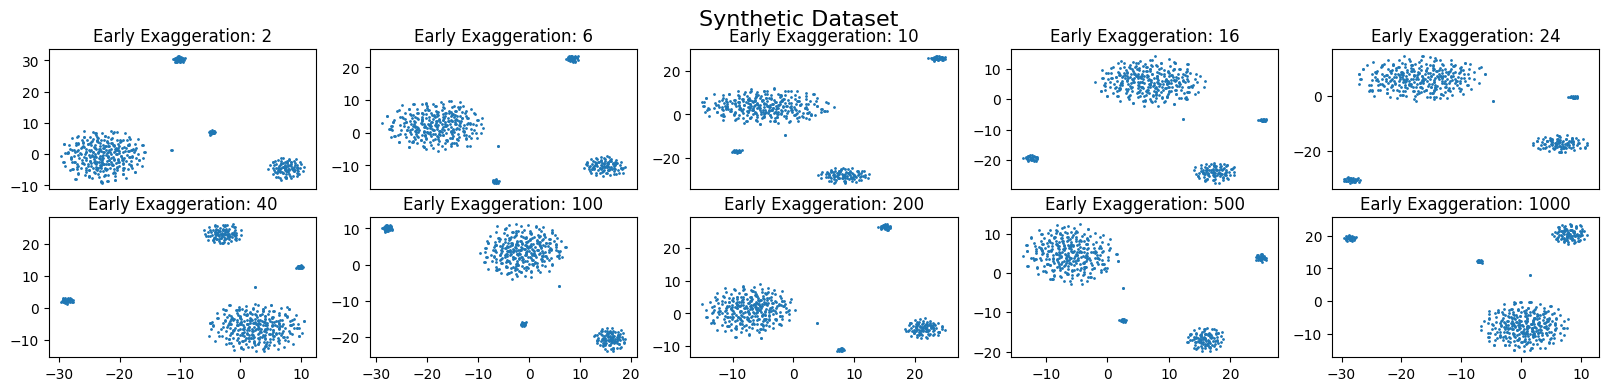

In [31]:
# ============== SYNTHETIC DATASET ============= #

# Create a figure with 2 rows and 5 columns
fig, axes = plt.subplots(2, half_tests, figsize=(20, 4))

# Perform a TSNE fit on the synthetic dataset for each of the perplexities
for idx, exaggeration in enumerate(exaggerations):

    # Perform a TSNE fit on the synthetic dataset
    tsne_model = TSNE(
        n_components=2, 
        early_exaggeration=exaggeration*2
    ) 
    tsne_fit = tsne_model.fit(pca_synthetic_fit.transform(synthetic_dataset))

    # Remove the x-axis ticks for all but the bottom row of subplots
    if idx < half_tests:
        ax = axes[0, idx]
        ax.set_xticks([])
    else:
        ax = axes[1, idx - half_tests]

    # Plot the TSNE fit
    ax.scatter(
        tsne_fit.embedding_[:, 0], 
        tsne_fit.embedding_[:, 1], 
        s=1
    )
    ax.set_title(f"Early Exaggeration: {exaggerations[idx] * 2}")

    # Add a super title to the figure
    fig.suptitle("Synthetic Dataset", fontsize=16)

# Show the plot
plt.show()

- According to the [openTSNE docs](https://opentsne.readthedocs.io/en/latest/parameters.html), early exaggeration acts during the initial phase of the t-SNE algorithm by increasing the attractive force between data points, while allowing each data point to move more freely through the point cloud. [IBM](https://www.ibm.com/docs/en/spss-modeler/18.1.1?topic=node-sne-expert-options) also provides a more practical definition, defining exaggeration as the parameter that controls the distance between naturally formed clusters or the parameter that controls how packed the clusters should be.

   This expected behavior was seen in the plots above, but it wasn't as evident as it was in the plots for perplexity. IBM states that early exaggeration should have a value between 1 and 9999999, so for the lower values (1-20), almost no change was seen in the end result aside from some variations coming from the randomness inherent to the algorithm. The effect of early exaggeration started to become more apparent when the exaggeration started going above the lower hundreds. Here, local clusters started packing themselves together a bit more, and the distance between clusters slowly started to increase as the exaggeration started approaching 1000.

   However, the exaggeration value where a more distinct separation appears varies from dataset to dataset. For the synthetic dataset, the value of exaggeration where the clusters start to become more distinct is around 1000, but for the real dataset, the value is closer to 500. This might be because the real dataset has a more tightly packed structure, so exaggeration needs to be increased to just 500 to start seeing the clusters separate themselves from each other while turning into a tighter cloud. The synthetic dataset on the other hand is a bit more spread out, so exaggeration needs to be increased far more aggressively to start seeing the clusters separate themselves from each other significantly.

   All in all, the observed effect of exaggeration was the same as the theoretical effect, but the exaggeration value where the effect is most apparent varies from dataset to dataset.
   

*Hyper-parameter 3: Effect of number of PC's for clustering*

In [2]:
# List the number of principal components to use for each of the tests
n_components = [10, 50, 100, 250, 500, 650, 750, 1000]

# Load the real dataset and apply the log2 transform
dataset = np.load("./data/p2_evaluation/X_train.npy")
dataset = np.log2(dataset + 1)

# Load the labels for the real dataset
labels = np.load("./data/p2_evaluation/y_train.npy")

# Get the total number of unique labels
unique_labels = len(np.unique(labels))

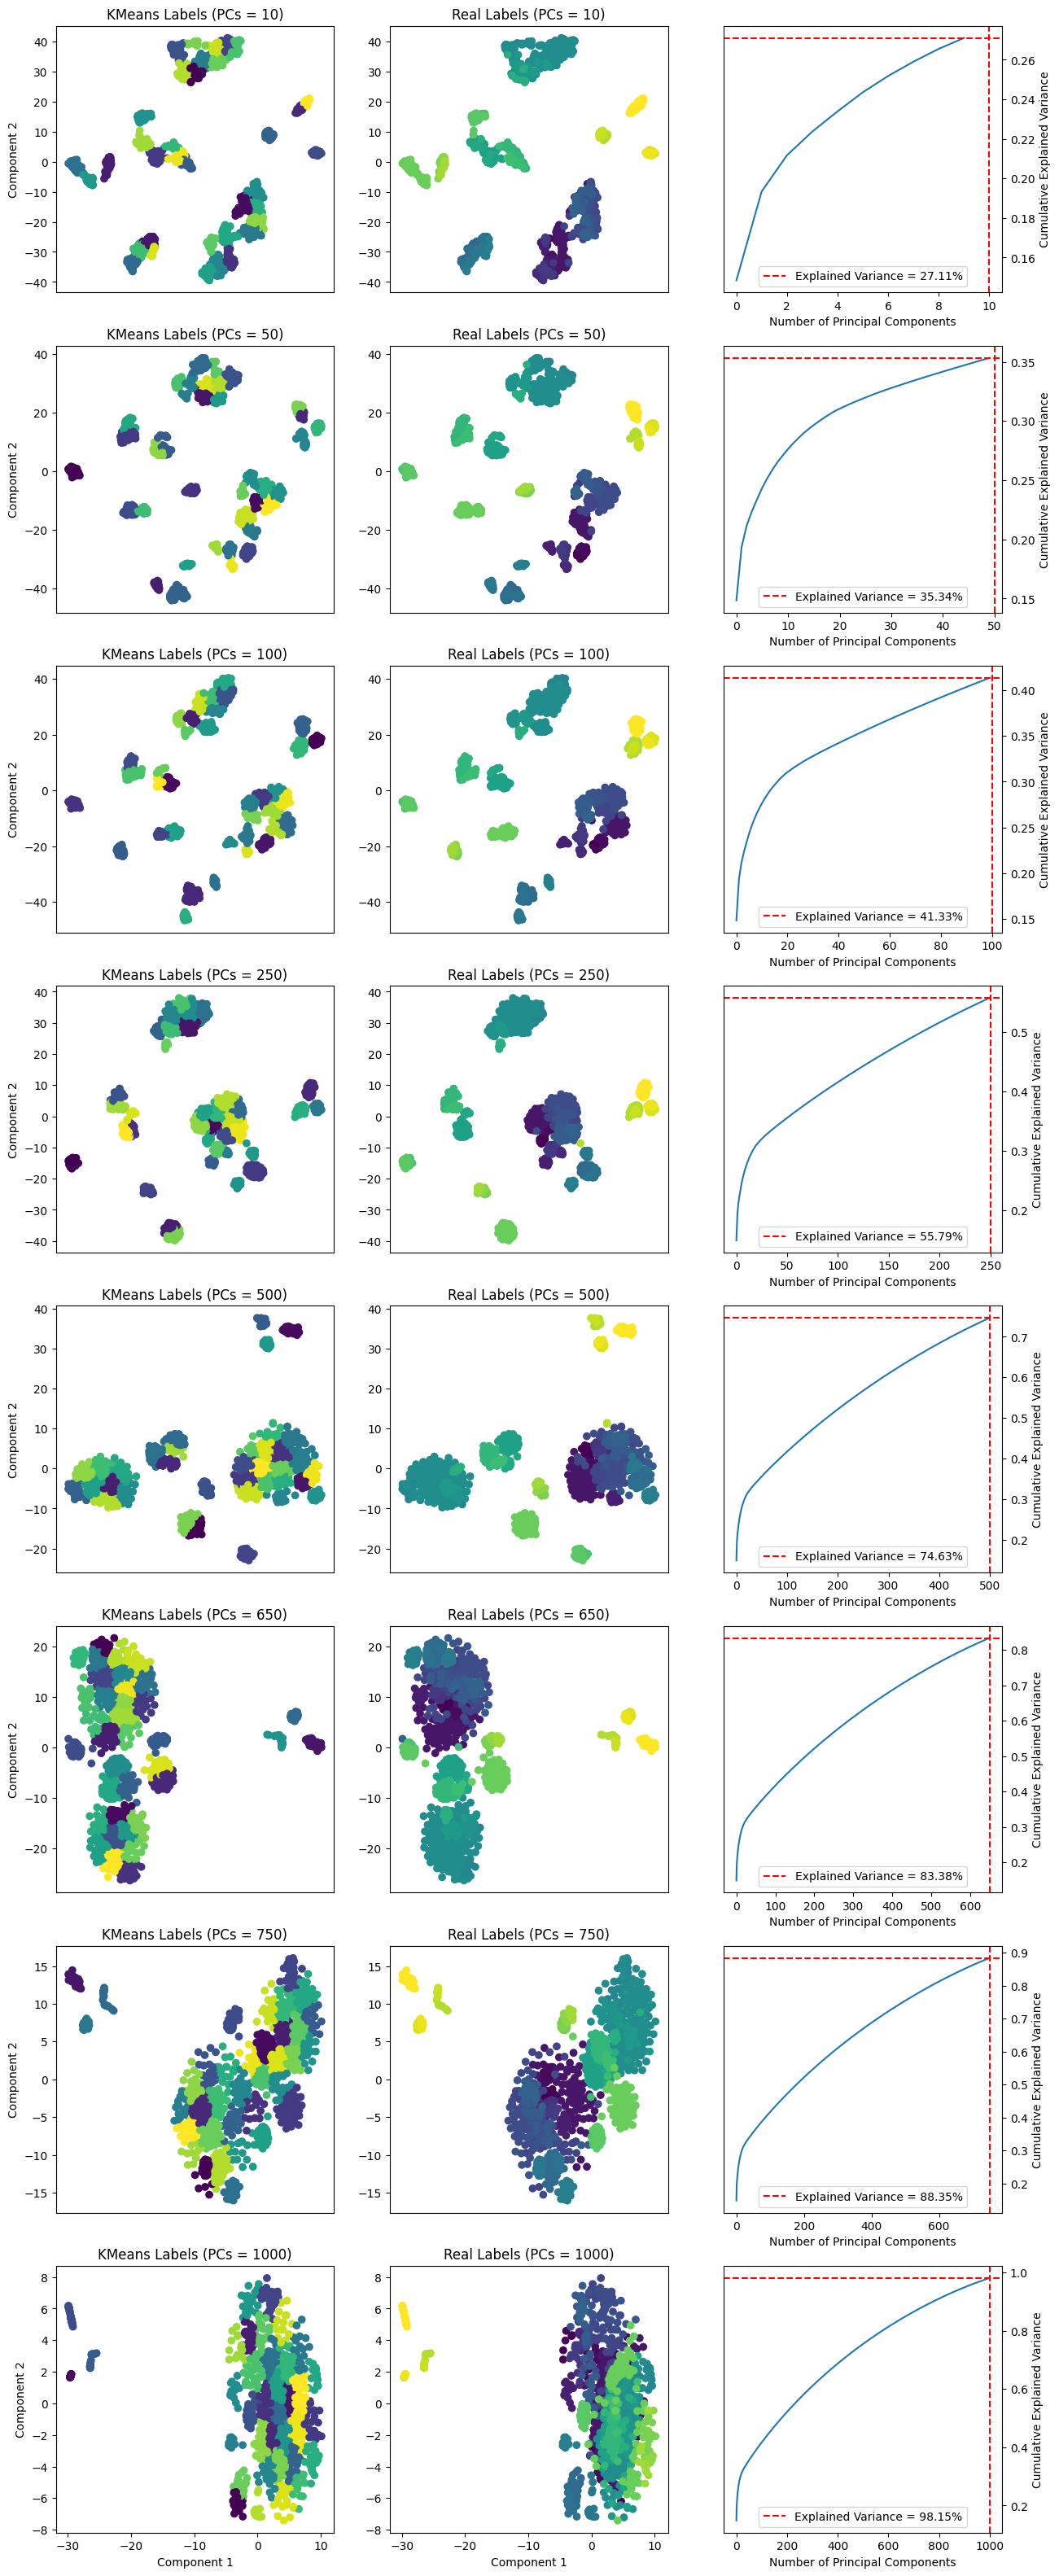

In [7]:
# Total number of tests to do and half of that number
total_tests = len(n_components)
half_tests = int(total_tests / 2)

# Create a figure with as many subplots as there are PCA fits and two rows
fig, axes = plt.subplots(total_tests, 3, figsize=(15, 40))

# Generate 1 plot with 5 subplots, one for the result of a TSNE fit for 
# each of the PCA results
for i, n_pcs in enumerate(n_components):

    # Reduce the number of features using PCA
    pca_fit = PCA(n_components=n_pcs).fit(dataset)

    # Perform a TSNE fit on the principal components of the data
    tsne_fit = TSNE(n_components=2).fit(pca_fit.transform(dataset))

    # Generate the cluster labels for the TSNE fit using KMeans
    kmeans = KMeans(n_clusters=unique_labels, n_init=10).fit(tsne_fit.embedding_)

    # Remove the x-axis ticks for all but the bottom row of subplots
    if i != (total_tests - 1):
        axes[i, 0].set_xticks([])
        axes[i, 1].set_xticks([])
    
    # Plot the TSNE fit with the applied KMeans labels and the real labels
    axes[i, 0].scatter(
        tsne_fit.embedding_[:, 0], 
        tsne_fit.embedding_[:, 1], 
        c=kmeans.labels_,
    )
    axes[i, 1].scatter(
        tsne_fit.embedding_[:, 0], 
        tsne_fit.embedding_[:, 1], 
        c=labels,
    )

    # Add plot label for the y-axis if it is in the first column of a row
    axes[i, 0].set_ylabel("Component 2")

    # Add x-labels only to the bottom row of subplots
    if i == (total_tests - 1):
        axes[i, 0].set_xlabel("Component 1")
        axes[i, 1].set_xlabel("Component 1")

    # Plot the explained variance ratio for each choice of principal components 
    axes[i, 2].plot(
        np.cumsum(pca_fit.explained_variance_ratio_)
    )

    # Get the percentage of explained variance for the current number of principal components
    explained_variance_percent = np.cumsum(pca_fit.explained_variance_ratio_)[n_pcs - 1]

    # Plot a both a vertical and horizontal line at the 85% variance explained
    axes[i, 2].axvline(
        n_pcs, 
        color='r', 
        linestyle='--'
    )
    axes[i, 2].axhline(
        explained_variance_percent, 
        color='r', 
        linestyle='--',
        label=f"Explained Variance = {explained_variance_percent:.2%}"
    )

    # Add plot labels for the third subplot in the row
    axes[i, 2].set_xlabel("Number of Principal Components")
    axes[i, 2].set_ylabel("Cumulative Explained Variance")
    axes[i, 2].yaxis.set_label_position("right")
    axes[i, 2].yaxis.tick_right()
    axes[i, 2].legend()

    # Set the titles for each of the subplots 
    axes[i, 0].set_title(f"KMeans Labels (PCs = {n_components[i]})")
    axes[i, 1].set_title(f"Real Labels (PCs = {n_components[i]})")

# Show the plot
plt.show()


- The following was done to gauge the effect of changing the number of principal componenets: 

  1. Create a small dimensionality reduction on the training data for problem 2 using PCA, the number of components used was given by a list of possible permutations
  2. TSNE was run on the lower dimensional dataset to generate appropriate visualization for the clustering
  3. KMeans was used to label the data in an unsupervised manner to simulate a scenario where the labels are not known
  4. Obtained the explained variance ratio for each number of principal components tried. Plotted the cumulative explained variance to see how much of the variance is captured by the components used in that test.
  5. Plotted the point cloud generated by TSNE, coloring using both the true labels and the labels obtained from KMeans

   This is very similar, in some aspects, to the first part of problem 3 (see above) where we plotted the results of the TSNE algorithm using different numbers of principal components. In a similar manner to that experiment, varying the number of principal components resulted in a change in how "packed" each set of clusters is and how many clusters are present in total. With lower values of principal components, there are a lot more small and self contained clusters, which don't represent a large amount of the dataset variance (For example: only 55% of the variance is explained by the first 250 components). As the number of principal components increases, the clusters start to converge into a single large cluster. The total number of features in this dataset is 1077, so reducing the number of principal components to just 1000 is not enough to generate properly distinct clusters. This could be thought off as a form of over-fitting, where the preliminary dimensionality reduction is capturing too much of the variance in the data, and as a result, the clusters are not able to be separated correctly. A lower number of principal components allows us to capture just enough variance to allow us to make educated guesses about the resulting separation between clusters. 
   
   A good compromise for the amount of components to use, seems to be around 500, where different big clusters are starting to form, but many of the small islands of data points remain intact. Obviously this changes from dataset to dataset, but here, I believe that 500 is a good number thanks to both its ratio of explained variance (around 80%) and the way the KMeans algorithm behaves when using this number of components. When KMeans is run on the data with 500 components, it generates distinct clusters that match pretty closely with the actual labels of the data. So thinking of this example as an actual real world application of unsupervised clustering, the use of 500 components would even result in a pretty good match for the actual labels of the data. The 85% mark used in other problems, shouldn't be taken as a hard rule, but rather as a good starting point for the number of components to use, depending on the data, this may lead to a perfect result, or it may lead to a very inaccurate clustering.

   In conclusion, increasing the number of PCs captures more and more of the variance of the data (as you are basically reaching the dimensionality of the original data), but at the same time, this will homogenize the generated clusters, making it harder to distinguish between them. The opposite is true when decreasing the number of PCs: The clusters become more distinct, but false separations between a single "real cluster" may start to appear. The best number of PCs to use is the one that captures a good amount of the variance of the data (use the 85% mark as a start for your search), while still allowing for the clusters to reflect the actual structure or labels of the data.
